# DSCI 619 - Deep Learning, Project 2

### *Jeffery Boczkaja*

In [3]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


## 1. Load the dataset

In [1]:
import pandas as pd
df1 = pd.read_csv('PRSA_data.csv')
df1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## 2. Clean the data and check missing values for this dataset

In [2]:
df1.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [3]:
df1.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [4]:
#Remove the rows with null values
df = df1.dropna()

# Checking shape before and after dropping NaN rows
original_shape = df1.shape
cleaned_shape = df.shape

original_shape, cleaned_shape

((35064, 18), (31815, 18))

In [5]:
catFeatures = ['wd', 'station']
df[catFeatures].describe(include='all').loc['unique', :]

wd         16
station     1
Name: unique, dtype: object

## 3. Convert all categorical variables to numerical values

In [6]:
catFeatures = ['wd', 'station']
factors = pd.get_dummies(df[catFeatures],drop_first=True)
factors.head()

,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df = df.drop(catFeatures, axis=1)
df = pd.concat([df, factors], axis=1)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,True,False,False,False,False,False,False,False,False,False
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,True,False,False,False,False,False,False,False,False,False
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,False,True,False,False,False,False,False,False,False,False
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,False,False,False,False,False,False,False,False,False,False


## 4. Split the data into 80% of training and 20% of the test dataset

In [8]:
X = df.drop('PM2.5', axis=1)
y = df['PM2.5']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

## 5. Preprocess the data using the normalization method to convert all features into the range of [0,1]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Verify normalization
X_test[:5]

array([[0.62761315, 0.5       , 0.72727273, 0.06666667, 0.95652174,
        0.05285412, 0.0062549 , 0.10416667, 0.05050505, 0.22419343,
        0.74255692, 0.42245989, 0.85062893, 0.        , 0.17857143,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.38385192, 0.25      , 0.72727273, 0.36666667, 0.82608696,
        0.09408034, 0.0193881 , 0.27430556, 0.05050505, 0.05625969,
        0.6619965 , 0.41176471, 0.83805031, 0.        , 0.08928571,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.14730628, 0.        , 0.81818182, 0.03333333, 0.2173913 ,
        0.00422833, 0.02376583, 0.07986111, 0.01010101, 0.07991233,
        0.55341506, 0.56327986, 0.57861635, 0.

## 6. Build a neuron network with two hidden layers of 20 and 10 neurons to forecast PM2.5 using all other features and TensorFlow. 

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
model = keras.Sequential()
# Input layer
model.add(layers.Dense(100, activation='relu'))
# First hidden layer
model.add(layers.Dense(20, activation='relu'))
# Second hidden layer
model.add(layers.Dense(10, activation='relu'))
# Output layer has one and only one neuron
model.add(layers.Dense(1))

In [13]:
#Configure the model by choosing optimizer and loss function
model.compile(optimizer='adam', loss='mse')

In [14]:
%%time 
tf.random.set_seed(1)
#Fit the model and save the results in history
history = model.fit(x=X_train,y=y_train,batch_size=64,epochs=100,
          validation_data=(X_test,y_test), verbose=0
          )

CPU times: total: 16.4 s
Wall time: 1min 23s


### Convert the train and validation loss to a df and look at the latest perfomance

In [15]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame(history.history)
#Add the epoch index
trainhist['epoch'] = history.epoch
#Look at the latest performance
trainhist.tail()

,loss,val_loss,epoch
95,432.930878,478.101196,95
96,433.918274,474.204437,96
97,429.814392,481.168304,97
98,431.188385,475.197540,98
99,431.921082,471.748199,99


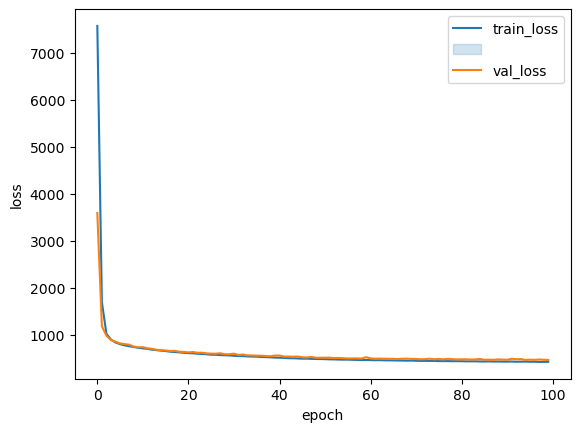

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

### Let's try it agin with more epochs

In [17]:
%%time
#Fix the seed
tf.random.set_seed(1)
#Increase the epochs to 10K
history = model.fit(x=X_train,y=y_train,batch_size=64,epochs=10,
          validation_data=(X_test,y_test), verbose=0
          )

CPU times: total: 1.17 s
Wall time: 8 s


In [18]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame(history.history)
#Add the epoch index
trainhist['epoch'] = history.epoch
#Look at the latest performance
trainhist.tail()

,loss,val_loss,epoch
5,424.715790,487.941071,5
6,422.896576,471.448578,6
7,424.732941,486.093262,7
8,423.649292,489.688934,8
9,423.586700,466.113861,9


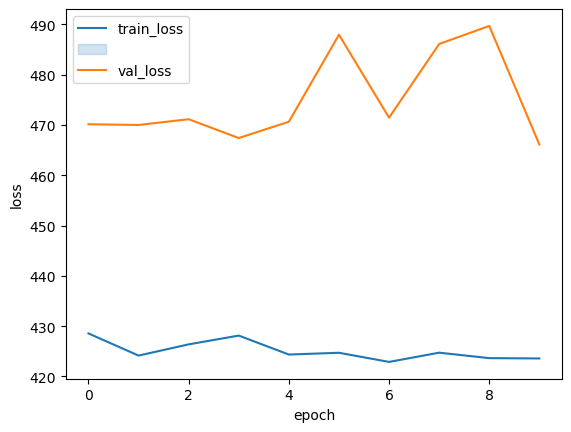

In [19]:
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss',  '', 'val_loss'])

### Does it overfit or underfit the data? Please justify your answer.

The model overfits the data for a few reason. The first reason being the training loss decreases with a steady slope and the validation loss steadly increases overtime with a positive slope. We see a very big difference here between the train loss and validation loss.

### If we changed a few things

In [20]:
%%time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import max_norm
model = keras.Sequential()
# Input layer has 200 neurons
model.add(layers.Dense(200, activation='relu'))
# Add dropout rate of 50%
model.add(Dropout(0.5))
# First hidden layer with 100 neurons
model.add(layers.Dense(100, activation='relu'))
# Add dropout rate of 50%
model.add(Dropout(0.5))
# Second hidden layer with 50 neurons
model.add(layers.Dense(50, activation='relu'))
# Add dropout rate of 50%
model.add(Dropout(0.5))
# Output layer has one and only one neuron
model.add(layers.Dense(1))

#Configure the model
model.compile(optimizer='adam',loss='mse')

#Fix the seed
tf.random.set_seed(1)
#Fit the Model
history = model.fit(x=X_train,y=y_train,batch_size=64,epochs=100,
          validation_data=(X_test,y_test), verbose=0
          )

CPU times: total: 31.3 s
Wall time: 2min 18s


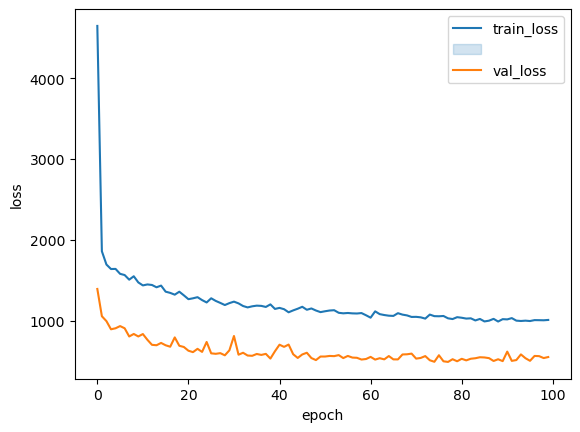

In [21]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame(history.history)
#Add the epoch index
trainhist['epoch'] = history.epoch

import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

## 7. Tune the model using the following hyperparameters using keras-tuner:
### - First hidden layer with units between 20 and 50 with a step size of 5
### - Second hidden layer with units between 5 and 10 with a step size of 1
### - The dropout rate for both hidden layers is between 0.2 and 0.8 with a step size of 0.1

In [22]:
import sys
#Check the existence of the keras-tuner library
if ( 'keras-tuner' not in sys.modules):
    #If it was not installed, then install it
    !pip install -q -U keras-tuner
#Import the library of keras-tuner
    import kerastuner as kt

Using TensorFlow backend


C:\Users\whitl\AppData\Local\Temp\ipykernel_7632\3295754333.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [23]:
def model_builder(hp):
  model = keras.Sequential()
 
  # Tune the number of units in the first input layer
  # Search the number of neurons from 20-50 with a stepsize of 5 in the first input layer.
  hp_units1 = hp.Int('units', min_value = 20, max_value = 50, step = 5)
  model.add(layers.Dense(units = hp_units1, activation = 'relu'))
  # Tune the dropout rate in the first input layer
  # Search the dropout rate in the first input layer in the range of 0.2-0.8 with a stepsize of 0.1.
  hp_dropout1 = hp.Float('rate', min_value = 0.2, max_value = 0.8, step = 0.1)
  model.add(Dropout(rate = hp_dropout1))
  # first hidden layer with 100 neurons
  model.add(layers.Dense(100, activation='relu'))
  # add dropout rate of 50%
  model.add(Dropout(0.5))
  # second hidden layer with 50 neurons
  model.add(layers.Dense(50, activation='relu'))
  # add dropout rate of 50%
  model.add(Dropout(0.5))
  # output layer has one and only one neuron
  # Tune the number of units in the second hidden layer
  hp_units2 = hp.Int('units2', min_value=5, max_value=10, step=1)
  model.add(layers.Dense(units=hp_units2, activation='relu'))
  # Tune dropout rate in the second hidden layer
  hp_dropout2 = hp.Float('dropout2', min_value=0.2, max_value=0.8, step=0.1)
  model.add(Dropout(rate=hp_dropout2))
  model.add(layers.Dense(1))

 # Tune the learning rate for the optimizer 
 # Search the lerning rate from 0.01, 0.001, or 0.0001.
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = 'mse', 
                metrics = [tf.keras.metrics.MeanSquaredError()])

  return model

In [24]:
tuner = kt.Hyperband(model_builder, #Specify the model
                     objective = 'val_loss', #Specify the objective function
                     max_epochs = 100, #Specify the maximum epochs
                     directory = 'Deep_Learning\Week_2', #Specify the file path
                     project_name = 'tuningRegression')

Reloading Tuner from Deep_Learning\Week_2\tuningRegression\tuner0.json


In [25]:
import IPython
#Clear all the training outputs
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [26]:

#Perform the search on the defined hyperparameter space by specifying the callback to clear the training outputs
tuner.search(X_train, y_train, epochs = 100, validation_data = (X_test,y_test), callbacks = [ClearTrainingOutput()])

In [27]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
#Use f-strings to format the outputs
print(f"""
The optimal number of units in the input layer =  {best_hps.get('units')}. 
The optimal dropout rate in the input layer = {best_hps.get('rate')}
The optimal learning rate for the optimizer of Adam = {best_hps.get('learning_rate')}.
""")


The optimal number of units in the input layer =  50. 
The optimal dropout rate in the input layer = 0.30000000000000004
The optimal learning rate for the optimizer of Adam = 0.001.



In [28]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

# Use f-strings to format the outputs
print(f"""
The optimal number of units in the first input layer = {best_hps.get('units1')}. 
The optimal dropout rate in the first input layer = {best_hps.get('dropout1')}
The optimal number of units in the second hidden layer = {best_hps.get('units2')}. 
The optimal dropout rate in the second hidden layer = {best_hps.get('dropout2')}
""") 


The optimal number of units in the first input layer = 30. 
The optimal dropout rate in the first input layer = 0.2
The optimal number of units in the second hidden layer = 7. 
The optimal dropout rate in the second hidden layer = 0.30000000000000004



### Retrain model with optimal hyperparameters

In [29]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs = 100, validation_data = (X_test,y_test))

Epoch 1/100
796/796 [==============================] - 4s 3ms/step - loss: 4999.4736 - mean_squared_error: 4999.4736 - val_loss: 1489.1342 - val_mean_squared_error: 1489.1342
Epoch 2/100
796/796 [==============================] - 2s 3ms/step - loss: 2911.5078 - mean_squared_error: 2911.5078 - val_loss: 1593.3275 - val_mean_squared_error: 1593.3275
Epoch 3/100
796/796 [==============================] - 2s 3ms/step - loss: 2746.8093 - mean_squared_error: 2746.8093 - val_loss: 1116.3102 - val_mean_squared_error: 1116.3102
Epoch 4/100
796/796 [==============================] - 2s 3ms/step - loss: 2549.2522 - mean_squared_error: 2549.2522 - val_loss: 1060.8224 - val_mean_squared_error: 1060.8224
Epoch 5/100
796/796 [==============================] - 2s 3ms/step - loss: 2539.8799 - mean_squared_error: 2539.8799 - val_loss: 1128.0179 - val_mean_squared_error: 1128.0179
Epoch 6/100
796/796 [==============================] - 2s 3ms/step - loss: 2521.3328 - mean_squared_error: 2521.3328 - val_lo

Epoch 48/100
796/796 [==============================] - 2s 3ms/step - loss: 1806.5707 - mean_squared_error: 1806.5707 - val_loss: 1058.7491 - val_mean_squared_error: 1058.7491
Epoch 49/100
796/796 [==============================] - 2s 3ms/step - loss: 1788.8512 - mean_squared_error: 1788.8512 - val_loss: 899.5995 - val_mean_squared_error: 899.5995
Epoch 50/100
796/796 [==============================] - 2s 3ms/step - loss: 1756.0177 - mean_squared_error: 1756.0177 - val_loss: 875.0244 - val_mean_squared_error: 875.0244
Epoch 51/100
796/796 [==============================] - 2s 3ms/step - loss: 1795.9742 - mean_squared_error: 1795.9742 - val_loss: 973.5036 - val_mean_squared_error: 973.5036
Epoch 52/100
796/796 [==============================] - 2s 3ms/step - loss: 1805.7552 - mean_squared_error: 1805.7552 - val_loss: 739.4960 - val_mean_squared_error: 739.4960
Epoch 53/100
796/796 [==============================] - 2s 3ms/step - loss: 1746.7220 - mean_squared_error: 1746.7220 - val_loss

796/796 [==============================] - 2s 3ms/step - loss: 1574.9406 - mean_squared_error: 1574.9406 - val_loss: 973.1837 - val_mean_squared_error: 973.1837
Epoch 96/100
796/796 [==============================] - 2s 3ms/step - loss: 1564.7803 - mean_squared_error: 1564.7803 - val_loss: 747.2605 - val_mean_squared_error: 747.2605
Epoch 97/100
796/796 [==============================] - 2s 3ms/step - loss: 1563.9465 - mean_squared_error: 1563.9465 - val_loss: 828.4808 - val_mean_squared_error: 828.4808
Epoch 98/100
796/796 [==============================] - 2s 3ms/step - loss: 1562.5392 - mean_squared_error: 1562.5392 - val_loss: 770.6883 - val_mean_squared_error: 770.6883
Epoch 99/100
796/796 [==============================] - 2s 3ms/step - loss: 1553.6093 - mean_squared_error: 1553.6093 - val_loss: 860.8866 - val_mean_squared_error: 860.8866
Epoch 100/100
796/796 [==============================] - 2s 3ms/step - loss: 1565.3823 - mean_squared_error: 1565.3823 - val_loss: 684.5159 - v

# The optimal model has the following:
    The optimal number of units in the input layer =  50. 
    The optimal dropout rate in the input layer = 0.3
    The optimal learning rate for the optimizer of Adam = 0.001.
    The optimal number of units in the first input layer = 30. 
    The optimal dropout rate in the first input layer = 0.2
    The optimal number of units in the second hidden layer = 7. 
    The optimal dropout rate in the second hidden layer = 0.3

### The optimal model would look like this

In [30]:
def model_create():
  model = keras.Sequential()
  #Set the optimal units of 50 found by tuner
  model.add(layers.Dense(units = 50, activation = 'relu'))
  #Set he optimal dropout rate of 0.3 found by tuner
  model.add(Dropout(rate = 0.3))
  #First hidden layer with 30 neurons
  model.add(layers.Dense(30, activation='relu'))
  #Add dropout rate of 50%
  model.add(Dropout(0.2))
  #Second hidden layer with 50 neurons
  model.add(layers.Dense(7, activation='relu'))
  #Add dropout rate of 30%
  model.add(Dropout(0.3))
  #Output layer has one and only one neuron
  model.add(layers.Dense(1))
  #Set the optimal learning rate of 0.001 found by tuner
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
                loss = 'mse', 
                metrics = [tf.keras.metrics.MeanSquaredError()])
  return model
# Create the model
model = model_create()

### Let's save the model for future ues

In [31]:
# def model_create():
#   model = keras.Sequential()
#   #Set the optimal units of 450 found by tuner
#   model.add(layers.Dense(units = 450, activation = 'relu'))
#   #Set he optimal dropout rate of 0.2 found by tuner
#   model.add(Dropout(rate = 0.2))
#   #First hidden layer with 100 neurons
#   model.add(layers.Dense(100, activation='relu'))
#   #Add dropout rate of 50%
#   model.add(Dropout(0.5))
#   #Second hidden layer with 50 neurons
#   model.add(layers.Dense(50, activation='relu'))
#   #Add dropout rate of 50%
#   model.add(Dropout(0.5))
#   #Output layer has one and only one neuron
#   model.add(layers.Dense(1))
#   #Set the optimal learning rate of 0.01 found by tuner
#   model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01),
#                 loss = 'mse', 
#                 metrics = [tf.keras.metrics.MeanSquaredError()])
#   return model
# # Create the model
# model = model_create()

In [32]:
# # Specify the directory to save the weights
# import os
# cp_path = "training/cp.regr"
# cp_dir = os.path.dirname(cp_path)

# # Create a callback to save the model's weights
# # We only save the best weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=cp_path, save_best_only=True,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# # Train the model and specif the defined callback using callbacks=[]
# model.fit(X_train, y_train, epochs = 100, validation_data = (X_test,y_test),
#          callbacks=[cp_callback])

In [33]:
# #First, create the model
# model = model_create()
# #Second, load the weights
# model.load_weights(cp_path)
# #Note here, we don't train the model at all
# #Third evaluate the model on the new dataset
# loss = model.evaluate(X_test, y_test, verbose=2)

# print("Reloaded model from file with loss: {:5.2f}".format(loss[1]))

In [34]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# y_pred = model.predict(X_test)
# 'The mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred))

In [35]:
# 'The root of mean square error is {0:.4f}'.format(mean_squared_error(y_test,y_pred,squared = False))

In [36]:
# 'The mean absolute error is {0:.4f}'.format(mean_absolute_error(y_test,y_pred)

## 8.  Build a neuron network with two hidden layers of 20 and 10 neurons to forecast PM2.5 using all other features and PyTorch.

### Let's make sure the data is ready to use

In [37]:
df1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [38]:
df1.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [39]:
df1.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [40]:
#Remove the rows with null values
df = df1.dropna()

# Checking shape before and after dropping NaN rows
original_shape = df1.shape
cleaned_shape = df.shape

original_shape, cleaned_shape

((35064, 18), (31815, 18))

In [41]:
catFeatures = ['wd', 'station']
df[catFeatures].describe(include='all').loc['unique', :]

wd         16
station     1
Name: unique, dtype: object

In [42]:
catFeatures = ['wd', 'station']
factors = pd.get_dummies(df[catFeatures],drop_first=True)
factors.head()

,wd_ENE,wd_ESE,wd_N,wd_NE,wd_NNE,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df = df.drop(catFeatures, axis=1)
df = pd.concat([df, factors], axis=1)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,True,False,False,False,False,False,False,False,False,False
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,False,False,False,False,False,False,False,False,False,False
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,True,False,False,False,False,False,False,False,False,False
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,False,True,False,False,False,False,False,False,False,False
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,False,False,False,False,False,False,False,False,False,False


In [44]:
X = df.drop('PM2.5', axis=1)
y = df['PM2.5']

#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Verify normalization
X_test[:5]

array([[0.62761315, 0.5       , 0.72727273, 0.06666667, 0.95652174,
        0.05285412, 0.0062549 , 0.10416667, 0.05050505, 0.22419343,
        0.74255692, 0.42245989, 0.85062893, 0.        , 0.17857143,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.38385192, 0.25      , 0.72727273, 0.36666667, 0.82608696,
        0.09408034, 0.0193881 , 0.27430556, 0.05050505, 0.05625969,
        0.6619965 , 0.41176471, 0.83805031, 0.        , 0.08928571,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.14730628, 0.        , 0.81818182, 0.03333333, 0.2173913 ,
        0.00422833, 0.02376583, 0.07986111, 0.01010101, 0.07991233,
        0.55341506, 0.56327986, 0.57861635, 0.

### Let's create the model

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [48]:
X_train = torch.tensor(X_train.astype(np.float32))
y_train = torch.tensor(y_train.values.astype(np.float32).reshape(-1,1))
y_train.shape
X_train.shape

torch.Size([25452, 30])

In [49]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
#specify the number of neuron for the first layer
hidden_size = [20, 10]
print(input_size)
print(output_size)

#convert numpy to tensor from_numpy
X_test = torch.from_numpy(X_test.astype(np.float32))

30
1


### Build the neural network

In [50]:
# define the child module class derivated from parent class of torch.nn.Module
class LinearRegressionModel(torch.nn.Module):
    #define the constructor
    def __init__(self, input_size,  hidden_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size[0]) 
        self.hidden2 = torch.nn.Linear(hidden_size[0], hidden_size[1]) 
        self.predict = torch.nn.Linear(hidden_size[1], output_size)  
    #overife the forward function in this child class
    def forward(self, x):
        x = F.relu(self.hidden1(x))  
        x = F.relu(self.hidden2(x))
        y_pred = self.predict(x)            
        return y_pred

In [51]:
model = LinearRegressionModel(input_size, hidden_size,  output_size)

In [52]:
l = nn.MSELoss()

In [53]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

In [54]:
%%time
from sklearn.metrics import mean_squared_error
#fix the random seeds for troch and np
torch.manual_seed(1)
np.random.seed(0)


#set the number of epochs

num_epochs = 10

train_loss = [None]*num_epochs
valadition_loss = [None]*num_epochs
for epoch in range(num_epochs):
    #forward pass
    y_pred = model(X_train.requires_grad_())

    #calculate the loss
    loss= l(y_pred, y_train)
    #Set the gradients to be zero
    optimizer.zero_grad()
    
    #backward pass: calculate gradients
    loss.backward()

    #update the weights
    optimizer.step()
        
    #Stop tracking the gradient by calling detach since we don't use it anymore
    y_pred = model(X_test).detach().numpy()
    val_loss = mean_squared_error(y_test,y_pred)
    train_loss[epoch] = loss.item()
    valadition_loss[epoch] = val_loss
    if epoch % 10 == 0:
        print('epoch {0}, loss = {1:.4f} and val_loss = {2:.4f}'.format(epoch, loss.item(), val_loss))
    

epoch 0, loss = 13091.7031 and val_loss = 13839.4433
CPU times: total: 750 ms
Wall time: 264 ms


In [55]:
#Convert the train and validation loss to a df
trainhist = pd.DataFrame({'train_loss': train_loss, 'val_loss': valadition_loss, 'epoch':np.arange(num_epochs)})
#Look at the latest performance
trainhist.tail()

,train_loss,val_loss,epoch
5,12592.032227,13092.403185,5
6,12312.192383,12703.399364,6
7,11931.091797,12197.183964,7
8,11435.590820,11564.778680,8
9,10817.328125,10806.053075,9


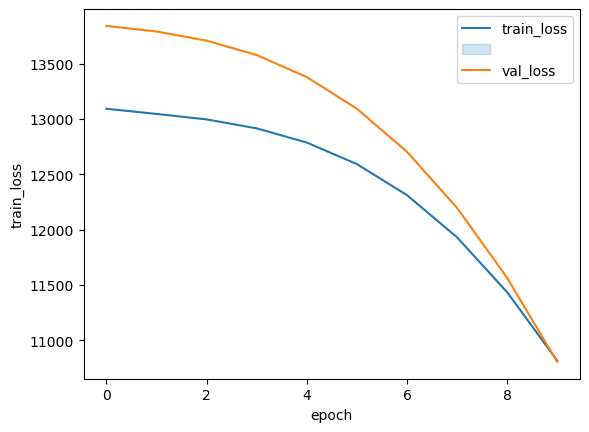

In [56]:
import matplotlib.pyplot as plt
#Plot train loss
sns.lineplot(x='epoch', y ='train_loss', data =trainhist)
#Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =trainhist)
#Add legends
plt.legend(labels=['train_loss', '', 'val_loss'])

### Does it overfit or underfit the data? Please justify your answer.

The model actually neither overfits or underifts the data. Both training and validation loss basically touch each other all the way out to the ten thousandth epoch. Training past around the 100th epoch isn't doing much for the model. 